In [2]:
from torchvision import datasets

In [18]:
from PIL import Image,ImageDraw

In [3]:
pwd

'/home/f/Notebooks/YOLOv3'

In [4]:
# import os
# os.chdir('/home/f/learning/Paper/Object Detection/YOLO/pytorch-yolo2-master')

In [5]:
from __future__ import print_function
import sys
# if len(sys.argv) != 4:
#     print('Usage:')
#     print('python train.py datacfg cfgfile weightfile')
#     exit()

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torchvision import datasets, transforms
from torch.autograd import Variable

from dataset.dataset import listDataset
import random
import math
import os

In [6]:
trainlist = '/home/f/nvme/VOC/voc_train.txt'

In [7]:
use_cuda = torch.cuda.is_available()

In [8]:
use_cuda

True

In [9]:
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}

In [10]:
train_loader = torch.utils.data.DataLoader(
        listDataset(trainlist, shape=(416, 416),
                       shuffle=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                       ]), 
                       train=True, 
#                        seen=model.seen,
                       seen=0,
                       batch_size=32,
                       num_workers=1),
        batch_size=64, shuffle=True, **kwargs)

In [11]:
d,l = next(iter(train_loader))

In [27]:
i = 1

In [28]:
img = transforms.ToPILImage()(d[i])

In [29]:
draw = ImageDraw.Draw(img)

In [30]:
w,h = img.size

In [31]:
box = int(l[i][1]*w),int(l[i][2]*h),int(l[i][3]*w),int(l[i][4]*h)

In [34]:
draw.rectangle((box))

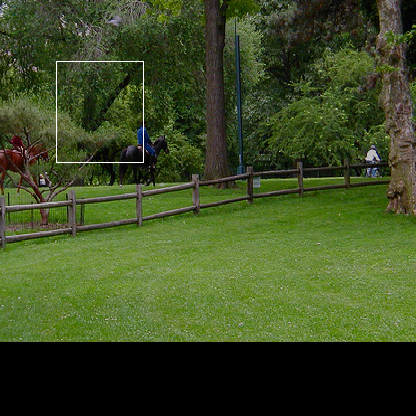

In [35]:
img

In [15]:
l[0]


 7.0000
 0.4230
 0.4995
 0.8460
 0.9990
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000
 0.0000

In [16]:
l[1]


 12.0000
  0.3449
  0.3901
  0.1358
  0.1475
 12.0000
  0.0631
  0.4062
  0.1262
  0.1582
 14.0000
  0.3568
  0.3552
  0.0647
  0.1367
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000


In [14]:
d.shape

torch.Size([64, 3, 416, 416])